<a href="https://colab.research.google.com/github/kimbaorrr/colab_exercises/blob/main/FuzzyLogic/FuzzyLogic_Lab6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U scikit-fuzzy

Số người nhiễm: 80000
Số người chết: 7000
Mức độ tiếp giáp [1- Không | 2- Có | 3: Gián tiếp]: 2
=> Với số người nhiễm = 80000, số người chết = 7000 và mức độ tiếp xúc = 2 thì khả năng lây lan là: 8.5811719385107


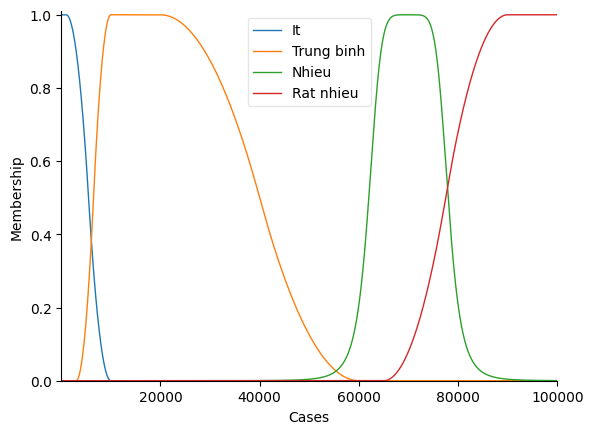

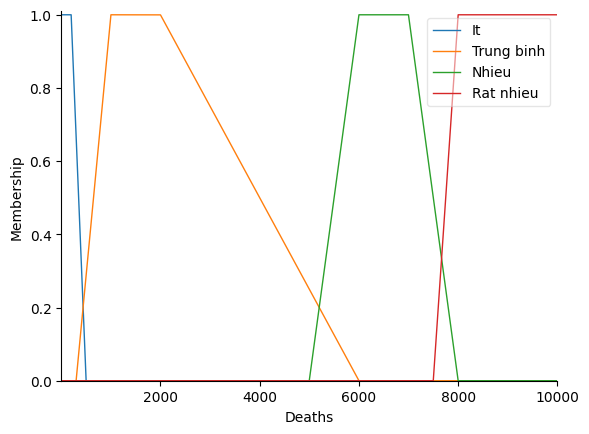

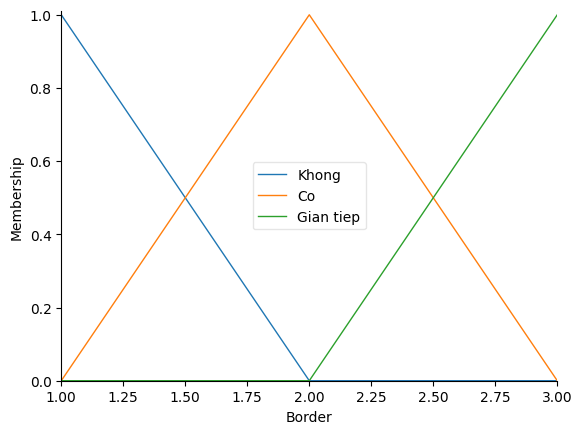

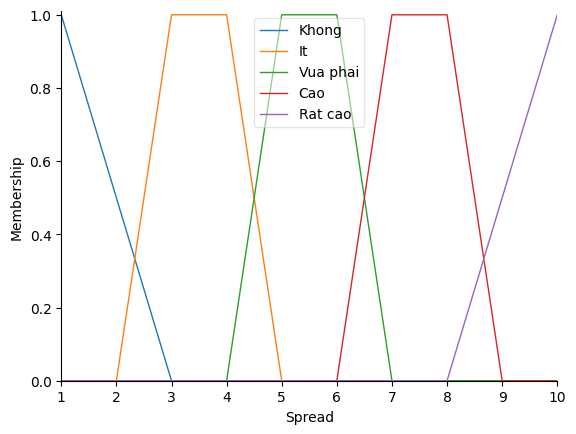

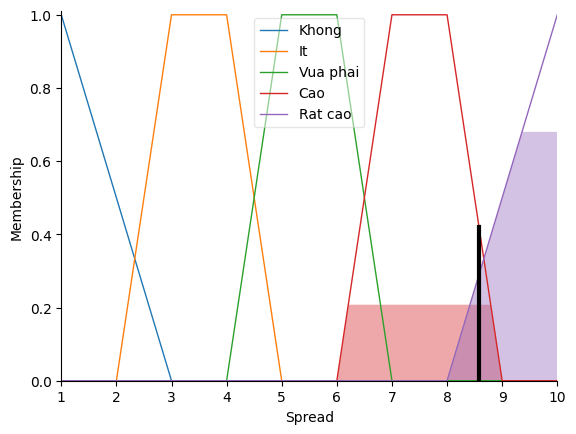

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import skfuzzy as fz
from skfuzzy import control as ctrl

C = ctrl.Antecedent(np.arange(1, 100001, 1), 'Cases')
D = ctrl.Antecedent(np.arange(1, 10001, 1), 'Deaths')
B = ctrl.Antecedent([1, 2, 3], 'Border')
S = ctrl.Consequent(np.arange(1, 11, 1), 'Spread')

C['It'] = fz.zmf(C.universe, 1000, 10000)
C['Trung binh'] = fz.pimf(C.universe, 3000, 10000, 20000, 60000)
C['Nhieu'] = fz.gbellmf(C.universe, 8000, 3, 70000)
C['Rat nhieu'] = fz.smf(C.universe, 65000, 90000)
C.view()

D['It'] = fz.trapmf(D.universe, [1, 1, 200, 500])
D['Trung binh'] = fz.trapmf(D.universe, [300, 1000, 2000, 6000])
D['Nhieu'] = fz.trapmf(D.universe, [5000, 6000, 7000, 8000])
D['Rat nhieu'] = fz.trapmf(D.universe, [7500, 8000, 10000, 10000])
D.view()

B["Khong"] = fz.trimf(B.universe, [1, 1, 2])
B["Co"] = fz.trimf(B.universe, [1, 2, 3])
B["Gian tiep"] = fz.trimf(B.universe, [2, 3, 3])
B.view()

S["Khong"] = fz.trimf(S.universe, [1, 1, 3])
S["It"] = fz.trapmf(S.universe, [2, 3, 4, 5])
S["Vua phai"] = fz.trapmf(S.universe, [4, 5, 6, 7])
S["Cao"] = fz.trapmf(S.universe, [6, 7, 8, 9])
S["Rat cao"] = fz.trimf(S.universe, [8, 10, 10])
S.view()

R1 = ctrl.Rule(C["It"] & D["It"] & (B["Khong"]),  S["Khong"])
R2 = ctrl.Rule(C["It"] & D["It"] & (B["Co"]),  S["It"])
R3 = ctrl.Rule(C["It"] & D["It"] & (B["Gian tiep"]),  S["Khong"])
R4 = ctrl.Rule(C["It"] & D["Trung binh"] & (B["Khong"]),  S["Khong"])
R5_6 = ctrl.Rule(C["It"] & D["Trung binh"] & (B["Co"] | B["Gian tiep"]),  S["It"])
R7_8_9 = ctrl.Rule(C["It"] & D["Nhieu"] & (B["Khong"] | B["Co"] | B["Gian tiep"]),  S["Vua phai"])
R10_11_12 = ctrl.Rule(C["It"] & D["Rat nhieu"] & (B["Khong"]|B["Co"]|B["Gian tiep"]),  S["Vua phai"])
R13 = ctrl.Rule(C["Trung binh"] & D["It"] & (B["Khong"]),  S["Khong"])
R14_15 = ctrl.Rule(C["Trung binh"] & D["It"] & (B["Co"] | B["Gian tiep"]),  S["It"])
R16 = ctrl.Rule(C["Trung binh"] & D["Trung binh"] & (B["Khong"]),  S["It"])
R17_18 = ctrl.Rule(C["Trung binh"] & D["Trung binh"] & (B["Co"] | B["Gian tiep"]),  S["Vua phai"])
R19 = ctrl.Rule(C["Trung binh"] & D["Nhieu"] & (B["Khong"]),  S["Vua phai"])
R20 = ctrl.Rule(C["Trung binh"] & D["Nhieu"] & (B["Co"]),  S["Cao"])
R21 = ctrl.Rule(C["Trung binh"] & D["Nhieu"] & (B["Gian tiep"]),  S["It"])
R22 = ctrl.Rule(C["Trung binh"] & D["Rat nhieu"] & (B["Khong"]),  S["Vua phai"])
R23 = ctrl.Rule(C["Trung binh"] & D["Rat nhieu"] & (B["Co"]),  S["Cao"])
R24 = ctrl.Rule(C["Trung binh"] & D["Rat nhieu"] & (B["Gian tiep"]),  S["Vua phai"])
R25_26 = ctrl.Rule(C["Nhieu"] & D["It"] & (B["Khong"] | B["Co"]),  S["Vua phai"])
R27 = ctrl.Rule(C["Nhieu"] & D["It"] & (B["Gian tiep"]),  S["It"])
R28 = ctrl.Rule(C["Nhieu"] & D["Trung binh"] & (B["Khong"]),  S["Vua phai"])
R29 = ctrl.Rule(C["Nhieu"] & D["Trung binh"] & (B["Co"]),  S["Cao"])
R30 = ctrl.Rule(C["Nhieu"] & D["Trung binh"] & (B["Gian tiep"]),  S["It"])
R31 = ctrl.Rule(C["Nhieu"] & D["Nhieu"] & (B["Khong"]),  S["It"])
R32 = ctrl.Rule(C["Nhieu"] & D["Nhieu"] & (B["Co"]),  S["Cao"])
R33 = ctrl.Rule(C["Nhieu"] & D["Nhieu"] & (B["Gian tiep"]),  S["Vua phai"])
R34 = ctrl.Rule(C["Nhieu"] & D["Rat nhieu"] & (B["Khong"]),  S["Cao"])
R35 = ctrl.Rule(C["Nhieu"] & D["Rat nhieu"] & (B["Co"]),  S["Rat cao"])
R36 = ctrl.Rule(C["Nhieu"] & D["Rat nhieu"] & (B["Gian tiep"]),  S["Cao"])
R37_38_39 = ctrl.Rule(C["Rat nhieu"] & D["It"] & (B["Khong"] | B["Co"]|B["Gian tiep"]),  S["Vua phai"])
R40 = ctrl.Rule(C["Rat nhieu"] & D["Trung binh"] & (B["Khong"]),  S["Vua phai"])
R41 = ctrl.Rule(C["Rat nhieu"] & D["Trung binh"] & (B["Co"]),  S["Cao"])
R42 = ctrl.Rule(C["Rat nhieu"] & D["Trung binh"] & (B["Gian tiep"]),  S["Vua phai"])
R43 = ctrl.Rule(C["Rat nhieu"] & D["Nhieu"] & (B["Khong"]),  S["Cao"])
R44 = ctrl.Rule(C["Rat nhieu"] & D["Nhieu"] & (B["Co"]),  S["Rat cao"])
R45 = ctrl.Rule(C["Rat nhieu"] & D["Nhieu"] & (B["Gian tiep"]),  S["Cao"])
R46 = ctrl.Rule(C["Rat nhieu"] & D["Rat nhieu"] & (B["Khong"]),  S["Cao"])
R47 = ctrl.Rule(C["Rat nhieu"] & D["Rat nhieu"] & (B["Co"]),  S["Rat cao"])
R48 = ctrl.Rule(C["Rat nhieu"] & D["Rat nhieu"] & (B["Gian tiep"]),  S["Cao"])

rules = [
    R1, R2, R3, R4, R5_6, R7_8_9, R10_11_12, R13, R14_15, R16,
R17_18, R19, R20, R21, R22, R23, R24, R25_26, R27, R28, R29, R30, R31, R32,
R33, R34, R35, R36, R37_38_39, R40, R41, R42, R43, R44, R45, R46, R47, R48
]
system = ctrl.ControlSystemSimulation(ctrl.ControlSystem(rules))
so_nguoi_nhiem = int(input('Số người nhiễm: '))
so_nguoi_chet = int(input('Số người chết: '))
md_tiep_giap = int(input('Mức độ tiếp giáp [1- Không | 2- Có | 3: Gián tiếp]: '))
system.input['Cases'] = so_nguoi_nhiem
system.input['Deaths'] = so_nguoi_chet
system.input['Border'] = md_tiep_giap
system.compute()
print(f'=> Với số người nhiễm = {so_nguoi_nhiem}, số người chết = {so_nguoi_chet} và mức độ tiếp xúc = {md_tiep_giap} thì khả năng lây lan là: {system.output["Spread"]}')
S.view(sim=system)